In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Simulator_new import Simulation

# 1

In [7]:
result = Simulation.run(0, 2e1, int(1e6), 2, save_every=10)

step 10000 of 1000000
step 20000 of 1000000
step 30000 of 1000000
step 40000 of 1000000
step 50000 of 1000000
step 60000 of 1000000
step 70000 of 1000000
step 80000 of 1000000
step 90000 of 1000000
step 100000 of 1000000
step 110000 of 1000000
step 120000 of 1000000
step 130000 of 1000000
step 140000 of 1000000
step 150000 of 1000000
step 160000 of 1000000
step 170000 of 1000000
step 180000 of 1000000
step 190000 of 1000000
step 200000 of 1000000
step 210000 of 1000000
step 220000 of 1000000
step 230000 of 1000000
step 240000 of 1000000
step 250000 of 1000000
step 260000 of 1000000
step 270000 of 1000000
step 280000 of 1000000
step 290000 of 1000000
step 300000 of 1000000
step 310000 of 1000000
step 320000 of 1000000
step 330000 of 1000000
step 340000 of 1000000
step 350000 of 1000000
step 360000 of 1000000
step 370000 of 1000000
step 380000 of 1000000
step 390000 of 1000000
step 400000 of 1000000
step 410000 of 1000000
step 420000 of 1000000
step 430000 of 1000000
step 440000 of 10000

In [9]:
energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std}')
print(f'Potential std: {potential_std}')
print(f'Energy std: {energy_std}')

Kinetic std: 0.03849884323927003
Potential std: 0.03849883583270068
Energy std: 7.987648526879144e-06


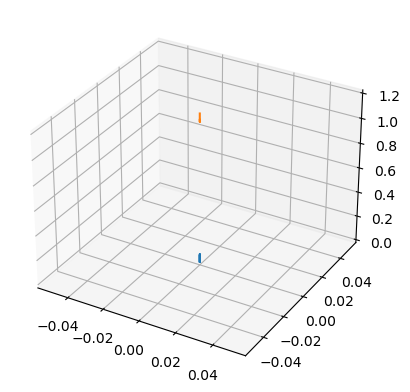

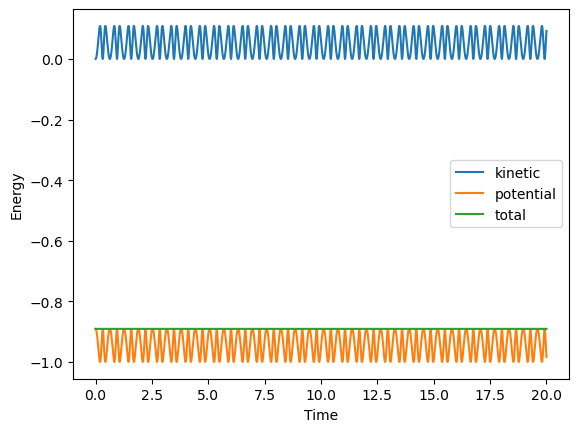

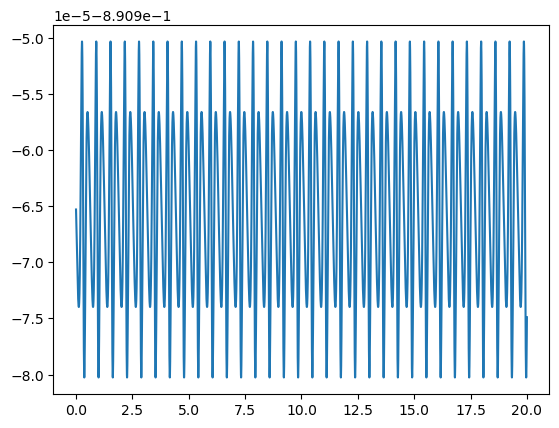

In [10]:
result.plot()
plt.show()

result.plot_energy()
plt.show()

plt.figure()
plt.plot(result.times[::result.save_every], result.total_energy)
plt.show()

# 2

In [16]:
result = Simulation(0, 2e2, int(1e7), 3, 10)

[5.55111512e-17 1.11022302e-16 0.00000000e+00]
step 100000 of 10000000
step 200000 of 10000000
step 300000 of 10000000
step 400000 of 10000000
step 500000 of 10000000
step 600000 of 10000000
step 700000 of 10000000
step 800000 of 10000000
step 900000 of 10000000
step 1000000 of 10000000
step 1100000 of 10000000
step 1200000 of 10000000
step 1300000 of 10000000
step 1400000 of 10000000
step 1500000 of 10000000
step 1600000 of 10000000
step 1700000 of 10000000
step 1800000 of 10000000
step 1900000 of 10000000
step 2000000 of 10000000
step 2100000 of 10000000
step 2200000 of 10000000
step 2300000 of 10000000
step 2400000 of 10000000
step 2500000 of 10000000
step 2600000 of 10000000
step 2700000 of 10000000
step 2800000 of 10000000
step 2900000 of 10000000
step 3000000 of 10000000
step 3100000 of 10000000
step 3200000 of 10000000
step 3300000 of 10000000
step 3400000 of 10000000
step 3500000 of 10000000
step 3600000 of 10000000
step 3700000 of 10000000
step 3800000 of 10000000
step 3900000

In [17]:
energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std}')
print(f'Potential std: {potential_std}')
print(f'Energy std: {energy_std}')

Kinetic std: 0.39216557254189205
Potential std: 0.3921655707236645
Energy std: 3.35224930465617e-05


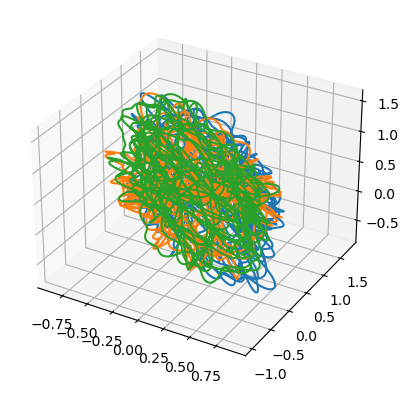

D:\Anaconda\envs\DataAnalysis\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


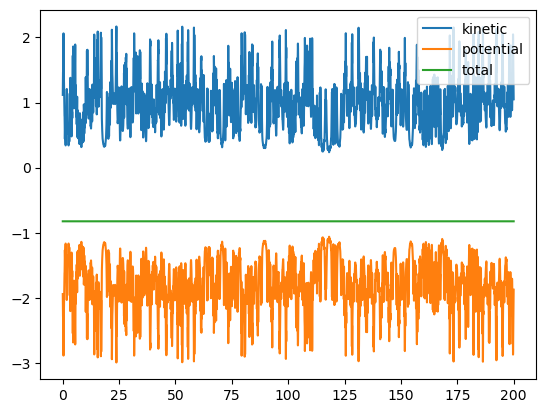

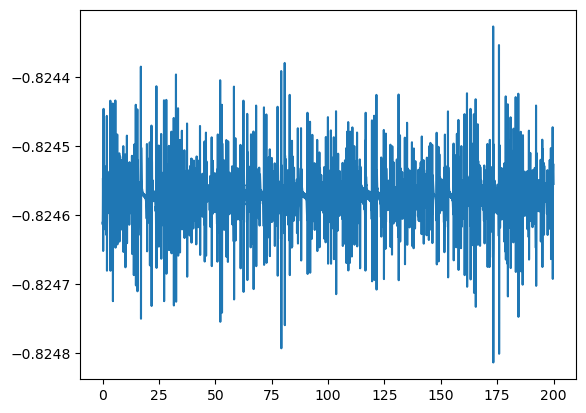

In [18]:
result.plot()
plt.show()

result.plot_energy()
plt.show()

plt.figure()
plt.plot(result.times[::result.save_every], result.total_energy)
plt.show()